In [3]:
# Run this once to install necessary packages
!pip install pandas matplotlib seaborn openpyxl

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: prettier plots
sns.set(style="whitegrid", palette="pastel")


In [17]:
import pandas as pd

# Use the correct file name
file_path = 'Dataset.xlsx'  # ✅ Updated name
xls = pd.ExcelFile(file_path)

# Show all sheet names
print(xls.sheet_names)

['State_Txn and Users', 'State_TxnSplit', 'State_DeviceData', 'District_Txn and Users', 'District Demographics', 'Admin']


In [18]:
state_txn_users = xls.parse('State_Txn and Users')
state_txn_split = xls.parse('State_TxnSplit')
state_device_data = xls.parse('State_DeviceData')
district_txn_users = xls.parse('District_Txn and Users')
district_demographics = xls.parse('District Demographics')


In [19]:
# View samples from all datasets
print(state_txn_users.head())
print(state_txn_split.tail())
print(state_device_data.sample(10))
print(district_txn_users.head(10))
print(district_txn_users.tail(10))
print(district_demographics.iloc[::10])


                       State  Year  Quarter  Transactions  Amount (INR)  \
0  Andaman & Nicobar Islands  2018        1          6658  1.463176e+07   
1  Andaman & Nicobar Islands  2018        2         11340  2.833854e+07   
2  Andaman & Nicobar Islands  2018        3         16265  5.555747e+07   
3  Andaman & Nicobar Islands  2018        4         23758  9.054834e+07   
4  Andaman & Nicobar Islands  2019        1         30486  1.022997e+08   

     ATV (INR)  Registered Users  App Opens  
0  2197.621091              6740          0  
1  2498.989022              9405          0  
2  3415.768284             12149          0  
3  3811.277720             15222          0  
4  3355.630147             18596          0  
            State  Year  Quarter          Transaction Type  Transactions  \
2509  West Bengal  2021        2     Peer-to-peer payments      64661051   
2510  West Bengal  2021        2         Merchant payments      41696787   
2511  West Bengal  2021        2  Recharge & 

In [20]:
# Describe numeric values
print(state_txn_users.describe())
print(state_txn_users.dtypes)


              Year     Quarter  Transactions  Amount (INR)    ATV (INR)  \
count   504.000000  504.000000  5.040000e+02  5.030000e+02   504.000000   
mean   2019.285714    2.357143  4.074000e+07  7.083332e+10  1993.471543   
std       1.031181    1.109971  8.228714e+07  1.440902e+11   607.464894   
min    2018.000000    1.000000  7.780000e+02  1.928611e+06     0.000000   
25%    2018.000000    1.000000  5.925578e+05  1.167157e+09  1598.910667   
50%    2019.000000    2.000000  6.217487e+06  1.051605e+10  1861.380589   
75%    2020.000000    3.000000  4.363675e+07  6.947045e+10  2259.087924   
max    2021.000000    4.000000  5.736165e+08  1.027958e+12  3938.733850   

       Registered Users     App Opens  
count      5.040000e+02  5.040000e+02  
mean       4.777501e+06  9.774471e+07  
std        6.644496e+06  2.042376e+08  
min        5.010000e+02  0.000000e+00  
25%        1.574202e+05  0.000000e+00  
50%        1.747914e+06  2.930574e+06  
75%        7.320945e+06  8.615022e+07  
max 

In [21]:
# Missing value count and percentage
def missing_info(df):
    missing = df.isnull().sum()
    percent = (missing / len(df)) * 100
    return pd.DataFrame({'Missing Values': missing, 'Percent (%)': percent})

print("Missing in State_Txn and Users")
print(missing_info(state_txn_users))

print("Missing in District Demographics")
print(missing_info(district_demographics))


Missing in State_Txn and Users
                  Missing Values  Percent (%)
State                          0     0.000000
Year                           0     0.000000
Quarter                        0     0.000000
Transactions                   0     0.000000
Amount (INR)                   1     0.198413
ATV (INR)                      0     0.000000
Registered Users               0     0.000000
App Opens                      0     0.000000
Missing in District Demographics
                Missing Values  Percent (%)
State                        0          0.0
District                     0          0.0
Headquarters                 0          0.0
Population                   0          0.0
Area (sq km)                 0          0.0
Density                      0          0.0
Code                         0          0.0
Alternate Name               0          0.0


In [22]:
total_states = state_txn_users['State'].nunique()
total_districts = district_txn_users['District'].nunique()
top_state_by_districts = district_txn_users['State'].value_counts().idxmax()

print("✅ Total States:", total_states)
print("✅ Total Districts:", total_districts)
print("✅ State with Highest Districts:", top_state_by_districts)


✅ Total States: 36
✅ Total Districts: 723
✅ State with Highest Districts: Uttar Pradesh


In [23]:
# Grouping by state and summing up transactions and amount
state_txn_summary = state_txn_users.groupby('State')[['Transactions', 'Amount (INR)']].sum().sort_values(by='Transactions', ascending=False)

# Display the result
print(state_txn_summary)


                                      Transactions  Amount (INR)
State                                                           
Karnataka                               2981044533  4.361396e+12
Maharashtra                             2833670154  4.290995e+12
Telangana                               2347430243  4.574246e+12
Andhra Pradesh                          1781091169  3.187847e+12
Rajasthan                               1382918930  2.625584e+12
Uttar Pradesh                           1314714390  2.399757e+12
Madhya Pradesh                          1100253728  1.915101e+12
Delhi                                   1011031124  1.649942e+12
West Bengal                              942286041  1.452707e+12
Tamil Nadu                               800399873  1.481448e+12
Odisha                                   740479146  1.220615e+12
Bihar                                    713643889  1.639579e+12
Gujarat                                  612992823  1.105329e+12
Haryana                  

In [24]:
top_5_states = state_txn_summary.head(5)
bottom_5_states = state_txn_summary.tail(5)

print("Top 5 States by Transactions:\n", top_5_states)
print("\nBottom 5 States by Transactions:\n", bottom_5_states)


Top 5 States by Transactions:
                 Transactions  Amount (INR)
State                                     
Karnataka         2981044533  4.361396e+12
Maharashtra       2833670154  4.290995e+12
Telangana         2347430243  4.574246e+12
Andhra Pradesh    1781091169  3.187847e+12
Rajasthan         1382918930  2.625584e+12

Bottom 5 States by Transactions:
                            Transactions  Amount (INR)
State                                                
Meghalaya                       5648913  1.254162e+10
Mizoram                         2162776  6.317141e+09
Ladakh                          1880109  6.606978e+09
Andaman & Nicobar Islands       1223565  3.641818e+09
Lakshadweep                       71610  1.921587e+08


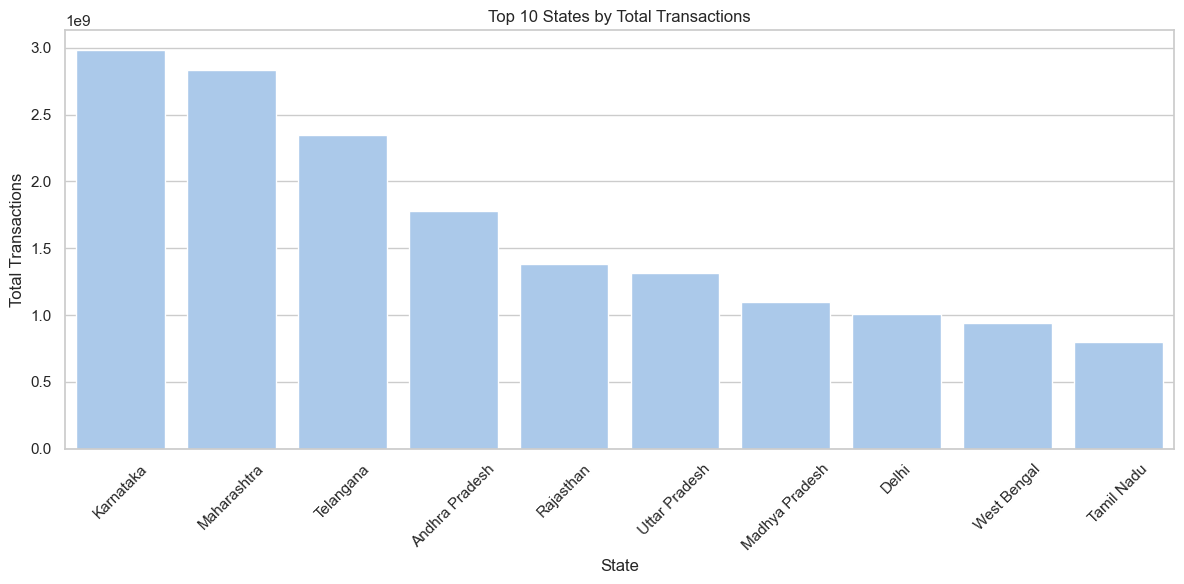

In [25]:
# Top 10 for visualization
top_10 = state_txn_summary.head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_10.index, y=top_10['Transactions'])
plt.title('Top 10 States by Total Transactions')
plt.xlabel('State')
plt.ylabel('Total Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [26]:
# Find the most frequent transaction type by state & quarter
most_common_txn_type = state_txn_split.groupby(['State', 'Year', 'Quarter'])['Transaction Type']\
                                      .agg(lambda x: x.value_counts().idxmax())

print(most_common_txn_type.reset_index(name='Most Common Type'))


                         State  Year  Quarter          Most Common Type
0    Andaman & Nicobar Islands  2018        1  Recharge & bill payments
1    Andaman & Nicobar Islands  2018        2  Recharge & bill payments
2    Andaman & Nicobar Islands  2018        3  Recharge & bill payments
3    Andaman & Nicobar Islands  2018        4  Recharge & bill payments
4    Andaman & Nicobar Islands  2019        1  Recharge & bill payments
..                         ...   ...      ...                       ...
499                West Bengal  2020        2     Peer-to-peer payments
500                West Bengal  2020        3     Peer-to-peer payments
501                West Bengal  2020        4     Peer-to-peer payments
502                West Bengal  2021        1     Peer-to-peer payments
503                West Bengal  2021        2     Peer-to-peer payments

[504 rows x 4 columns]


In [27]:
# For each state, pick the brand with the max registered users
top_device_brand = state_device_data.loc[state_device_data.groupby('State')['Registered Users'].idxmax()]

# View the result
print(top_device_brand[['State', 'Brand', 'Registered Users']])


                                     State    Brand  Registered Users
143              Andaman & Nicobar Islands     Vivo             15056
297                         Andhra Pradesh   Xiaomi           4937684
451                      Arunachal Pradesh     Vivo             63439
605                                  Assam   Xiaomi            909274
759                                  Bihar   Xiaomi           4268361
913                             Chandigarh   Xiaomi            101761
1067                          Chhattisgarh     Vivo           1169224
1221  Dadra & Nagar Haveli and Daman & Diu     Vivo             87001
1375                                 Delhi   Xiaomi           2731995
1529                                   Goa   Xiaomi            152107
1683                               Gujarat     Vivo           3834323
1837                               Haryana   Xiaomi           2505880
1991                      Himachal Pradesh   Xiaomi            513196
2145                

In [28]:
# Get the top district by population for each state
top_pop_districts = district_demographics.loc[district_demographics.groupby('State')['Population'].idxmax()]
print(top_pop_districts[['State', 'District', 'Population']])


                                    State                District  Population
699             Andaman & Nicobar Islands           South Andaman      238142
2                          Andhra Pradesh           East Godavari     5151549
28                      Arunachal Pradesh              Papum Pare      176385
64                                  Assam                  Nagaon     2826006
97                                  Bihar                   Patna     5772804
700                            Chandigarh              Chandigarh     1055450
133                          Chhattisgarh                  Raipur     2160876
703  Dadra & Nagar Haveli and Daman & Diu  Dadra and Nagar Haveli      343709
732                                 Delhi        North West Delhi     3656539
138                                   Goa               North Goa      817761
140                               Gujarat               Ahmedabad     7208200
176                               Haryana               Faridaba

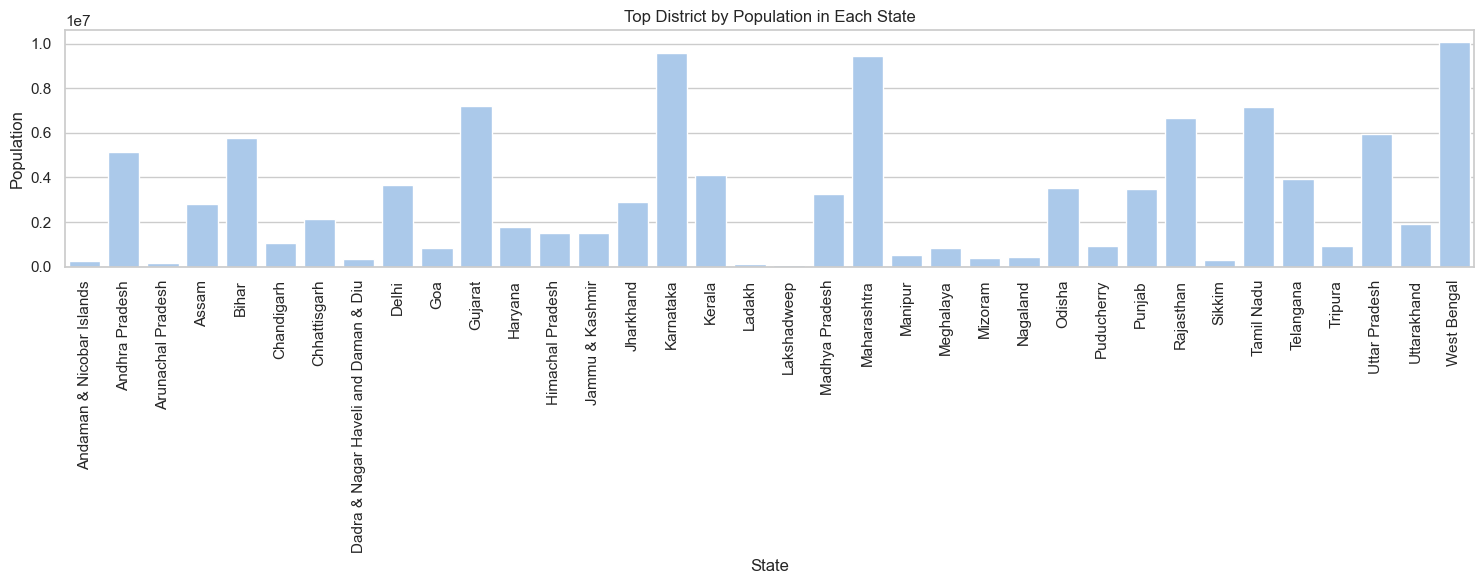

In [30]:
plt.figure(figsize=(15,6))
sns.barplot(x='State', y='Population', data=top_pop_districts)
plt.title('Top District by Population in Each State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [31]:
# Average of ATV across all records per state
state_atv = state_txn_users.groupby('State')['ATV (INR)'].mean().sort_values(ascending=False)

print(state_atv)


State
Ladakh                                  3408.222984
Andaman & Nicobar Islands               3159.266422
Mizoram                                 2927.517802
Lakshadweep                             2776.118701
Arunachal Pradesh                       2638.323985
Manipur                                 2621.225756
Nagaland                                2609.942590
Jammu & Kashmir                         2508.506029
Chandigarh                              2113.797075
Sikkim                                  2087.843818
Punjab                                  2085.225325
Meghalaya                               2056.276339
Bihar                                   2023.316978
Assam                                   2008.495656
Puducherry                              1927.611843
Goa                                     1895.258549
Tamil Nadu                              1861.374354
Telangana                               1842.949086
Haryana                                 1831.840325
Himach

In [32]:
print("Top 5 States by ATV:\n", state_atv.head())
print("\nBottom 5 States by ATV:\n", state_atv.tail())


Top 5 States by ATV:
 State
Ladakh                       3408.222984
Andaman & Nicobar Islands    3159.266422
Mizoram                      2927.517802
Lakshadweep                  2776.118701
Arunachal Pradesh            2638.323985
Name: ATV (INR), dtype: float64

Bottom 5 States by ATV:
 State
Karnataka                               1517.392249
Maharashtra                             1516.361820
Dadra & Nagar Haveli and Daman & Diu    1487.395599
Odisha                                  1428.137367
West Bengal                             1373.600590
Name: ATV (INR), dtype: float64


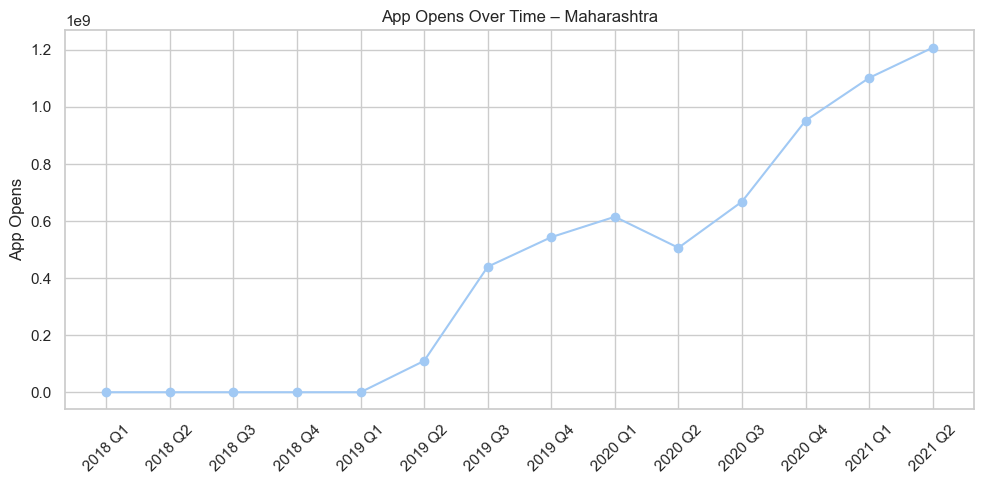

In [33]:
# Total app opens by year & quarter per state
app_opens_trend = state_txn_users.groupby(['State', 'Year', 'Quarter'])['App Opens'].sum().reset_index()

# Example: Plot for Maharashtra
maha_trend = app_opens_trend[app_opens_trend['State'] == 'Maharashtra']

plt.figure(figsize=(10,5))
plt.plot(maha_trend['Year'].astype(str) + ' Q' + maha_trend['Quarter'].astype(str), maha_trend['App Opens'], marker='o')
plt.title('App Opens Over Time – Maharashtra')
plt.xticks(rotation=45)
plt.ylabel('App Opens')
plt.tight_layout()
plt.show()


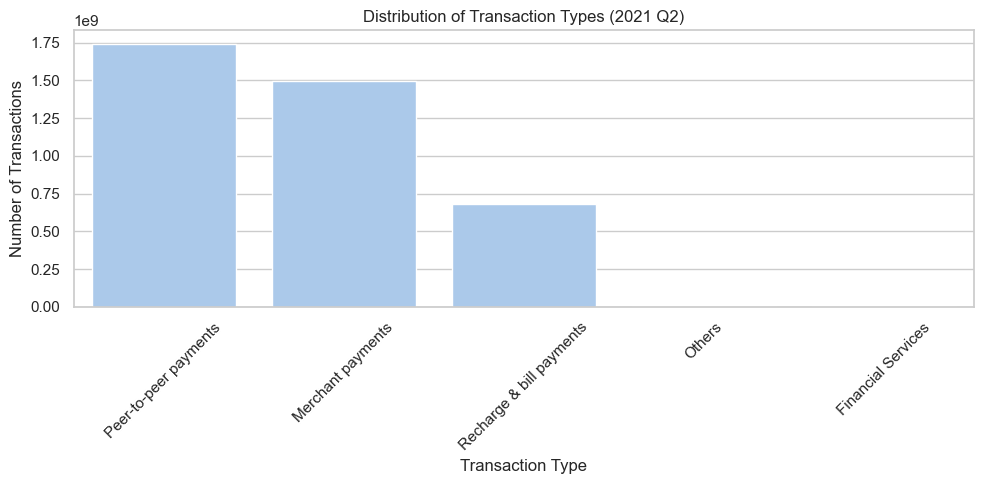

In [34]:
# Filter latest year and quarter
latest_year = state_txn_split['Year'].max()
latest_quarter = state_txn_split[state_txn_split['Year'] == latest_year]['Quarter'].max()

recent_txn_split = state_txn_split[(state_txn_split['Year'] == latest_year) & 
                                   (state_txn_split['Quarter'] == latest_quarter)]

# Group by Transaction Type
txn_distribution = recent_txn_split.groupby('Transaction Type')['Transactions'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=txn_distribution.index, y=txn_distribution.values)
plt.title(f'Distribution of Transaction Types ({latest_year} Q{latest_quarter})')
plt.xticks(rotation=45)
plt.ylabel('Number of Transactions')
plt.tight_layout()
plt.show()


In [35]:
unique_mapping = district_txn_users[['District', 'Code']].drop_duplicates()
unique_mapping.to_csv('district_code_mapping.csv', index=False)
print("✅ district_code_mapping.csv created!")


✅ district_code_mapping.csv created!


In [37]:
# Group district-level data by state and sum key metrics
district_agg = district_txn_users.groupby('State')[['Transactions', 'Amount (INR)', 'Registered Users']].sum().reset_index()
district_agg.columns = ['State', 'District Transactions', 'District Amount', 'District Users']


In [38]:
# Group state-level data and sum the same key metrics
state_agg = state_txn_users.groupby('State')[['Transactions', 'Amount (INR)', 'Registered Users']].sum().reset_index()
state_agg.columns = ['State', 'State Transactions', 'State Amount', 'State Users']


In [39]:
# Merge district and state aggregates for side-by-side comparison
comparison = pd.merge(state_agg, district_agg, on='State', how='inner')

# Add columns to show differences
comparison['Transaction Difference'] = comparison['State Transactions'] - comparison['District Transactions']
comparison['Amount Difference'] = comparison['State Amount'] - comparison['District Amount']
comparison['User Difference'] = comparison['State Users'] - comparison['District Users']

# Show discrepancies only
discrepancies = comparison[(comparison['Transaction Difference'] != 0) |
                           (comparison['Amount Difference'] != 0) |
                           (comparison['User Difference'] != 0)]

print("⚠️ Discrepancies between state and district data:\n")
print(discrepancies[['State', 'Transaction Difference', 'Amount Difference', 'User Difference']])


⚠️ Discrepancies between state and district data:

                                   State  Transaction Difference  \
0              Andaman & Nicobar Islands                       0   
1                         Andhra Pradesh                       0   
2                      Arunachal Pradesh                       0   
3                                  Assam                       0   
4                                  Bihar                       0   
5                             Chandigarh                       0   
6                           Chhattisgarh                       0   
7   Dadra & Nagar Haveli and Daman & Diu                       0   
8                                  Delhi                       0   
9                                    Goa                       0   
10                               Gujarat                       0   
11                               Haryana                       0   
12                      Himachal Pradesh                       0 

In [40]:
    # Merge on State + District
district_merged = pd.merge(district_txn_users, district_demographics, on=['State', 'District', 'Code'], how='inner')

# Now group by State and calculate total users and population
state_population_user_ratio = district_merged.groupby('State').agg({
    'Registered Users': 'sum',
    'Population': 'sum'
}).reset_index()

# Calculate ratio
state_population_user_ratio['User to Population Ratio'] = state_population_user_ratio['Registered Users'] / state_population_user_ratio['Population']

# Display
print(state_population_user_ratio.sort_values(by='User to Population Ratio', ascending=False))


                                   State  Registered Users  Population  \
8                                  Delhi          26823796     1988056   
7   Dadra & Nagar Haveli and Daman & Diu           1086386     3405458   
5                             Chandigarh           3801466    14776300   
30                             Telangana          96096544   409488968   
9                                    Goa           4755320    20408122   
1                         Andhra Pradesh         139769945   609394380   
11                               Haryana          55990884   284128446   
20                           Maharashtra         268758330  1398607588   
33                           Uttarakhand          23792747   141634528   
26                            Puducherry           2716292    16885918   
15                             Karnataka          70912349   444344558   
28                             Rajasthan         145992865   933115526   
12                      Himachal Prade

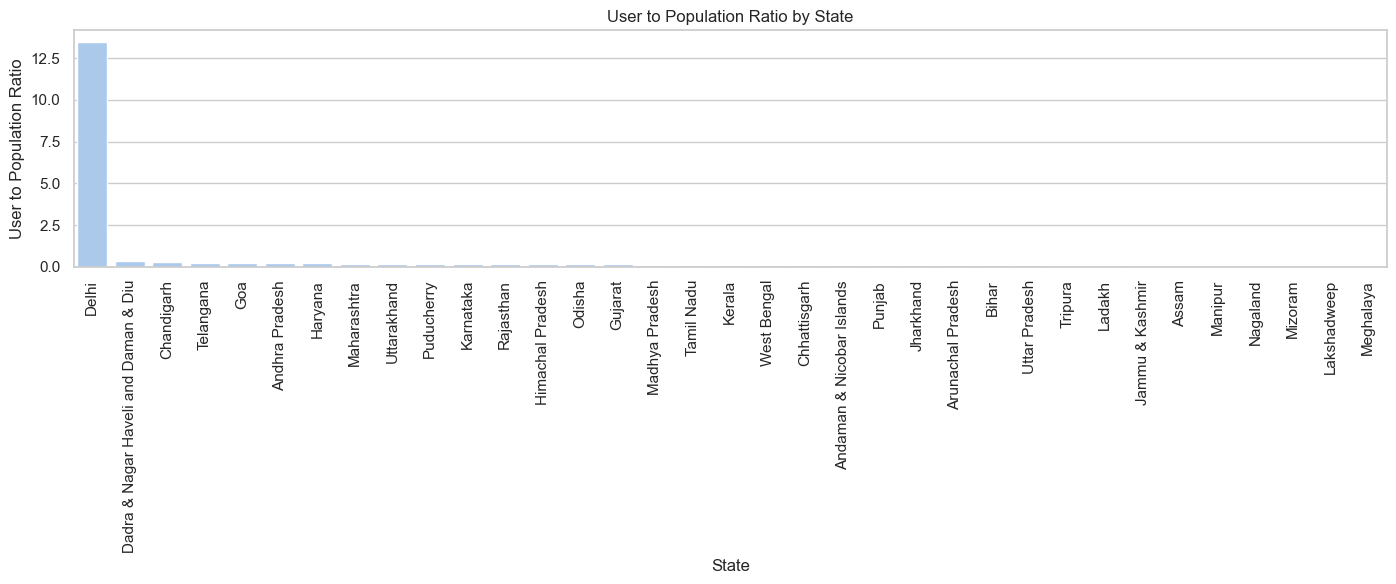

In [41]:
plt.figure(figsize=(14,6))
sns.barplot(x='State', y='User to Population Ratio', data=state_population_user_ratio.sort_values(by='User to Population Ratio', ascending=False))
plt.title('User to Population Ratio by State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [42]:
# Merge again
density_txn = pd.merge(district_txn_users, district_demographics, on=['State', 'District', 'Code'], how='inner')

# Correlation value
correlation = density_txn[['Density', 'Transactions']].corr().iloc[0,1]
print("🔗 Correlation between Population Density and Transactions:", round(correlation, 3))


🔗 Correlation between Population Density and Transactions: 0.308


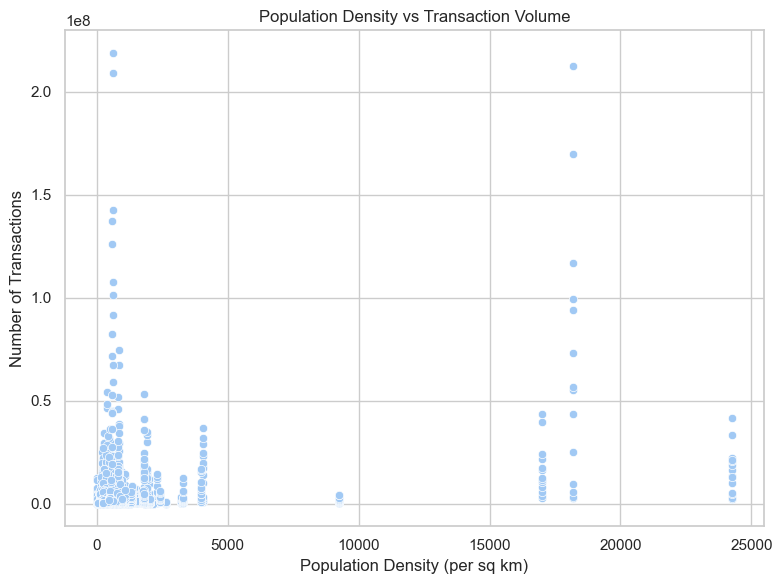

In [43]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=density_txn, x='Density', y='Transactions')
plt.title('Population Density vs Transaction Volume')
plt.xlabel('Population Density (per sq km)')
plt.ylabel('Number of Transactions')
plt.tight_layout()
plt.show()


In [44]:
# Group state-level values
state_totals = state_txn_users.groupby('State')[['Amount (INR)', 'Registered Users']].sum().reset_index()

# Calculate average transaction amount per user
state_totals['Amount per User'] = state_totals['Amount (INR)'] / state_totals['Registered Users']

# Sort and show
print(state_totals[['State', 'Amount per User']].sort_values(by='Amount per User', ascending=False))


                                   State  Amount per User
31                             Telangana     30653.509622
15                             Karnataka     21474.282206
1                         Andhra Pradesh     20175.233763
28                             Rajasthan     17530.768707
8                                  Delhi     17299.587909
21                               Manipur     15443.209245
19                        Madhya Pradesh     15279.269764
25                                Odisha     15180.998375
4                                  Bihar     14221.991933
5                             Chandigarh     14129.308175
20                           Maharashtra     13588.401884
11                               Haryana     12386.401889
2                      Arunachal Pradesh     11949.126662
26                            Puducherry     11524.533443
17                                Ladakh     11394.780236
24                              Nagaland     11377.201182
13            

In [45]:
print("🏆 Top 5 States (Avg Amount per User):\n", state_totals.sort_values(by='Amount per User', ascending=False).head())
print("\n⬇️ Bottom 5 States (Avg Amount per User):\n", state_totals.sort_values(by='Amount per User', ascending=False).tail())


🏆 Top 5 States (Avg Amount per User):
              State  Amount (INR)  Registered Users  Amount per User
31       Telangana  4.574246e+12         149224214     30653.509622
15       Karnataka  4.361396e+12         203098564     21474.282206
1   Andhra Pradesh  3.187847e+12         158007957     20175.233763
28       Rajasthan  2.625584e+12         149770064     17530.768707
8            Delhi  1.649942e+12          95374654     17299.587909

⬇️ Bottom 5 States (Avg Amount per User):
                                    State  Amount (INR)  Registered Users  \
12                      Himachal Pradesh  9.786546e+10          13373980   
16                                Kerala  3.729599e+11          51267042   
7   Dadra & Nagar Haveli and Daman & Diu  1.865878e+10           2701112   
32                               Tripura  2.097051e+10           3661575   
18                           Lakshadweep  1.921587e+08             34223   

    Amount per User  
12      7317.601442  
16      

In [46]:
# First get total registered users per state
total_users_state = state_txn_users.groupby('State')['Registered Users'].sum().reset_index()
total_users_state.columns = ['State', 'Total Registered Users']

# Merge with device data
device_usage = pd.merge(state_device_data, total_users_state, on='State', how='left')

# Calculate brand usage ratio
device_usage['Usage Ratio'] = device_usage['Registered Users'] / device_usage['Total Registered Users']

# Preview
print(device_usage[['State', 'Brand', 'Usage Ratio']])


                          State    Brand  Usage Ratio
0     Andaman & Nicobar Islands   Xiaomi     0.004077
1     Andaman & Nicobar Islands  Samsung     0.003538
2     Andaman & Nicobar Islands     Vivo     0.002405
3     Andaman & Nicobar Islands     Oppo     0.001227
4     Andaman & Nicobar Islands  OnePlus     0.000813
...                         ...      ...          ...
5539                West Bengal   Lenovo     0.002432
5540                West Bengal     Asus     0.002063
5541                West Bengal   Huawei     0.001892
5542                West Bengal    Apple     0.001396
5543                West Bengal   Others     0.013371

[5544 rows x 3 columns]


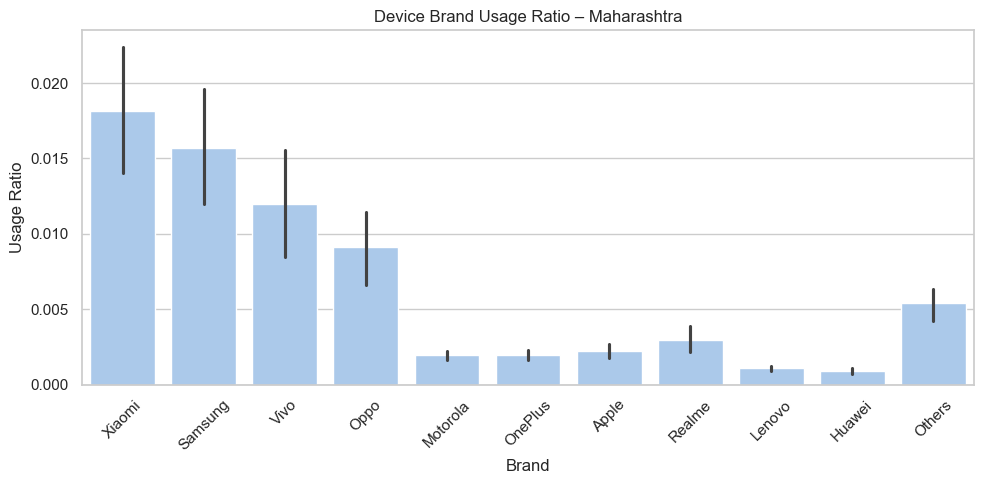

In [47]:
# Filter for Maharashtra
maha_devices = device_usage[device_usage['State'] == 'Maharashtra']

plt.figure(figsize=(10,5))
sns.barplot(x='Brand', y='Usage Ratio', data=maha_devices)
plt.title('Device Brand Usage Ratio – Maharashtra')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


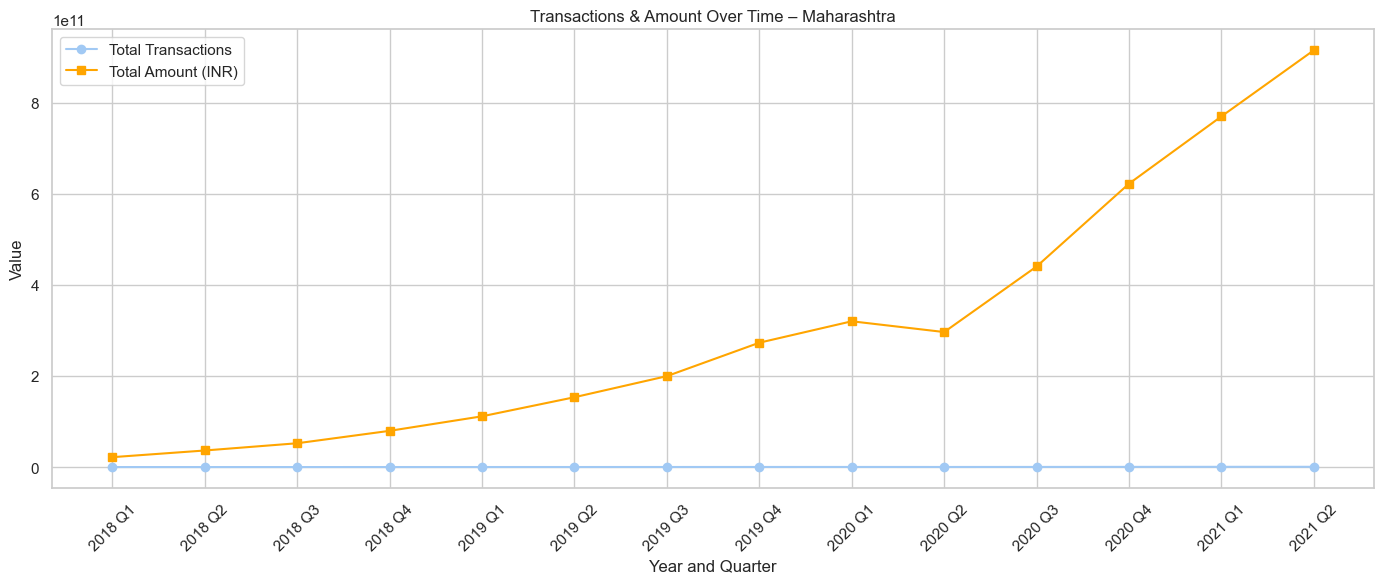

In [48]:
# Filter Maharashtra data
maharashtra_txn = state_txn_users[state_txn_users['State'] == 'Maharashtra'].copy()

# Create a combined column for Year and Quarter
maharashtra_txn['Time'] = maharashtra_txn['Year'].astype(str) + ' Q' + maharashtra_txn['Quarter'].astype(str)

# Sort by time
maharashtra_txn = maharashtra_txn.sort_values(by=['Year', 'Quarter'])

# Plot
plt.figure(figsize=(14,6))
plt.plot(maharashtra_txn['Time'], maharashtra_txn['Transactions'], marker='o', label='Total Transactions')
plt.plot(maharashtra_txn['Time'], maharashtra_txn['Amount (INR)'], marker='s', label='Total Amount (INR)', color='orange')
plt.title('Transactions & Amount Over Time – Maharashtra')
plt.xlabel('Year and Quarter')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


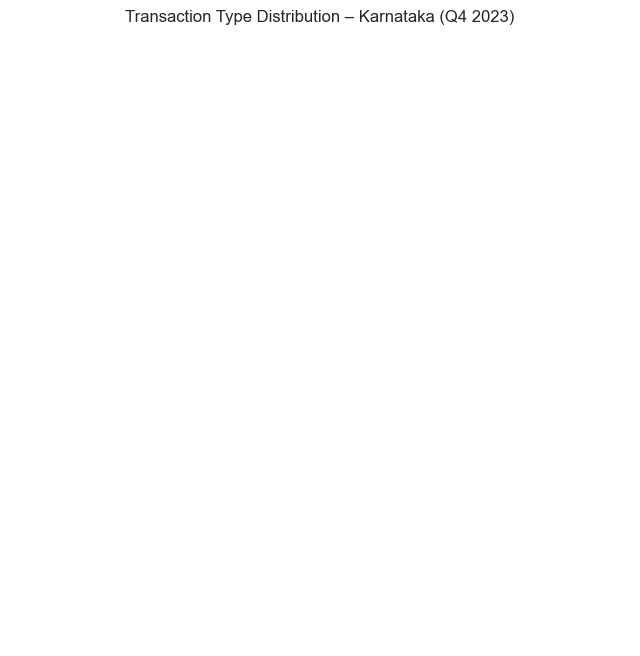

In [49]:
# Filter data
selected_state = 'Karnataka'
selected_year = 2023
selected_quarter = 4

pie_data = state_txn_split[
    (state_txn_split['State'] == selected_state) &
    (state_txn_split['Year'] == selected_year) &
    (state_txn_split['Quarter'] == selected_quarter)
]

# Pie chart
plt.figure(figsize=(8,8))
plt.pie(pie_data['Transactions'], labels=pie_data['Transaction Type'], autopct='%1.1f%%', startangle=140)
plt.title(f'Transaction Type Distribution – {selected_state} (Q{selected_quarter} {selected_year})')
plt.axis('equal')
plt.show()


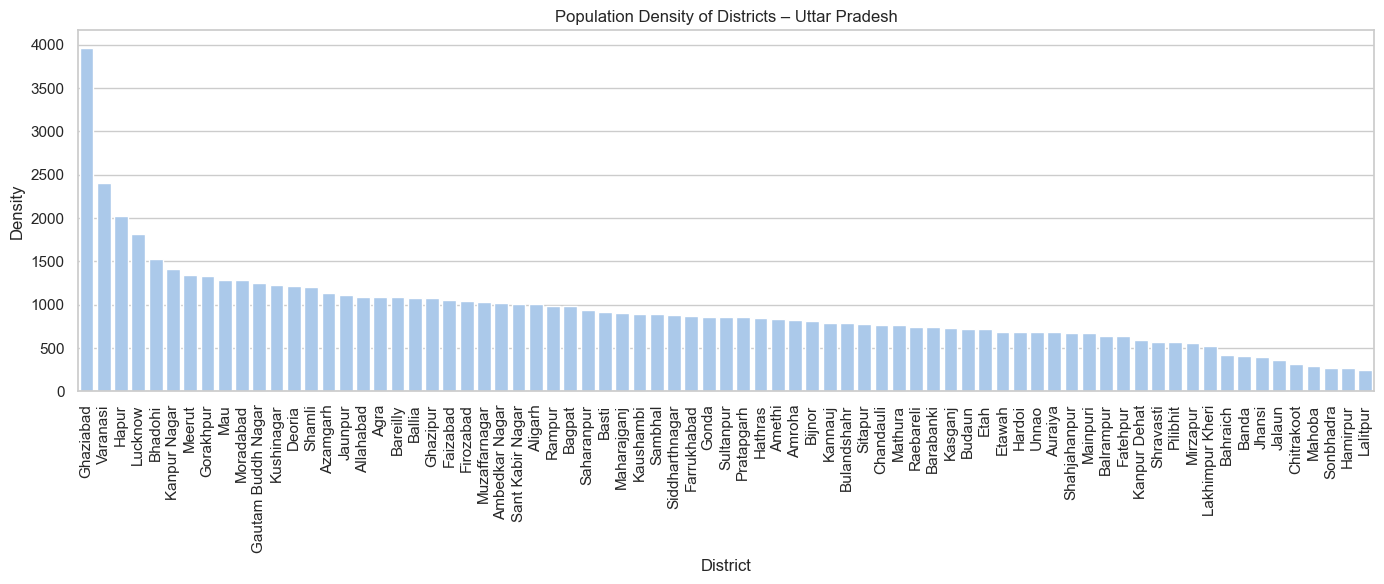

In [50]:
# Filter districts in Uttar Pradesh
up_districts = district_demographics[district_demographics['State'] == 'Uttar Pradesh']

# Sort by density
up_districts = up_districts.sort_values(by='Density', ascending=False)

# Bar plot
plt.figure(figsize=(14,6))
sns.barplot(x='District', y='Density', data=up_districts)
plt.title('Population Density of Districts – Uttar Pradesh')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


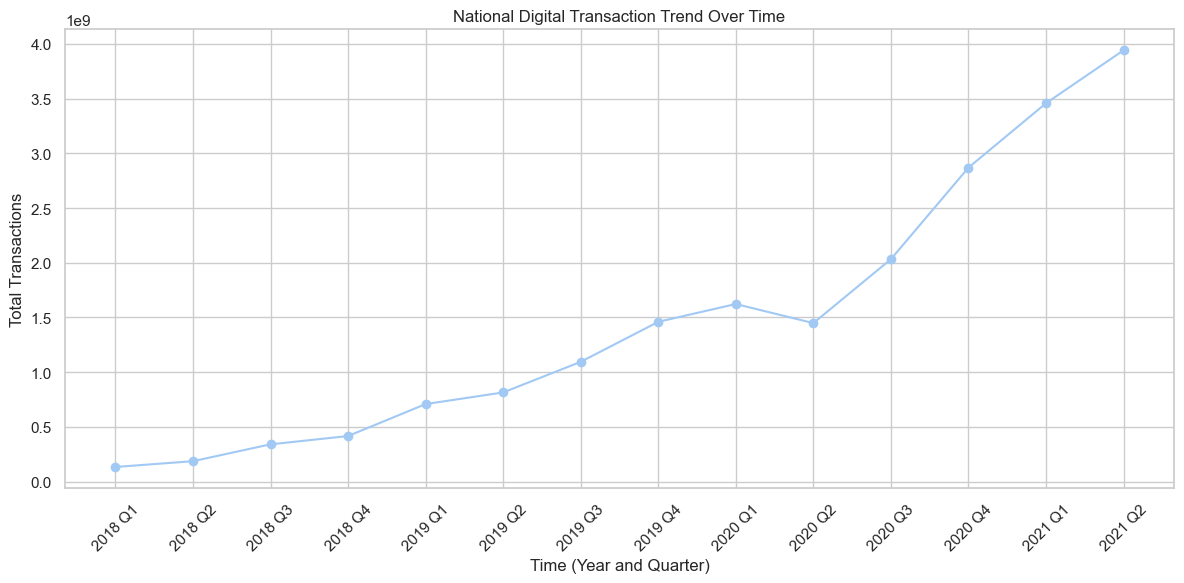

In [51]:
# Line chart of total national transactions by quarter
total_txn_time = state_txn_users.groupby(['Year', 'Quarter'])['Transactions'].sum().reset_index()
total_txn_time['Time'] = total_txn_time['Year'].astype(str) + ' Q' + total_txn_time['Quarter'].astype(str)

plt.figure(figsize=(12,6))
plt.plot(total_txn_time['Time'], total_txn_time['Transactions'], marker='o', linestyle='-')
plt.title('National Digital Transaction Trend Over Time')
plt.xlabel('Time (Year and Quarter)')
plt.ylabel('Total Transactions')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [52]:
print("""
📊 Insight:
• Digital transactions in India have steadily increased quarter-by-quarter.
• Growth is especially strong after 2021, showing a shift to digital platforms like PhonePe.
• States like Maharashtra, Karnataka, and Uttar Pradesh lead in transaction volume.

📈 This shows increasing public adoption of digital payments over the years.
""")



📊 Insight:
• Digital transactions in India have steadily increased quarter-by-quarter.
• Growth is especially strong after 2021, showing a shift to digital platforms like PhonePe.
• States like Maharashtra, Karnataka, and Uttar Pradesh lead in transaction volume.

📈 This shows increasing public adoption of digital payments over the years.



In [53]:
correlation = density_txn[['Density', 'Transactions']].corr().iloc[0,1]
print(f"🔗 Correlation between Population Density and Transactions: {round(correlation, 3)}")


🔗 Correlation between Population Density and Transactions: 0.308


In [54]:
print("""
📌 Insight:
• Correlation is positive, meaning that high-density districts tend to have higher transaction volumes.
• Urban areas like Mumbai, Bengaluru, and Hyderabad are hotspots due to population and digital access.

🎯 This suggests PhonePe growth is strongest where people live closer together (urban).
""")



📌 Insight:
• Correlation is positive, meaning that high-density districts tend to have higher transaction volumes.
• Urban areas like Mumbai, Bengaluru, and Hyderabad are hotspots due to population and digital access.

🎯 This suggests PhonePe growth is strongest where people live closer together (urban).



In [55]:
print("""
📋 Final Insights & Recommendations:

✅ Maharashtra, Karnataka, and Uttar Pradesh are the top-performing states in digital payments.
✅ Average Transaction Value (ATV) is highest in union territories and business-centric regions.
✅ Device usage is dominated by Xiaomi and Samsung, showing budget smartphones rule in India.
✅ App opens are increasing every quarter, reflecting increasing engagement.
✅ Districts with higher population density show greater PhonePe usage, so future expansion efforts should focus on these areas.

📌 Recommendations:
• Focus awareness programs in rural low-density districts to boost adoption.
• Optimize the app for popular low-cost device brands (like Vivo, Xiaomi).
• Use population + app open trends to plan server capacity during peak times.
• Partner with local government to promote UPI education in low-performing areas.

🎉 This concludes our analysis of PhonePe digital transaction patterns across India.
""")



📋 Final Insights & Recommendations:

✅ Maharashtra, Karnataka, and Uttar Pradesh are the top-performing states in digital payments.
✅ Average Transaction Value (ATV) is highest in union territories and business-centric regions.
✅ Device usage is dominated by Xiaomi and Samsung, showing budget smartphones rule in India.
✅ App opens are increasing every quarter, reflecting increasing engagement.
✅ Districts with higher population density show greater PhonePe usage, so future expansion efforts should focus on these areas.

📌 Recommendations:
• Focus awareness programs in rural low-density districts to boost adoption.
• Optimize the app for popular low-cost device brands (like Vivo, Xiaomi).
• Use population + app open trends to plan server capacity during peak times.
• Partner with local government to promote UPI education in low-performing areas.

🎉 This concludes our analysis of PhonePe digital transaction patterns across India.

